Implementing Autoencoders

In [2]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


#Part 0: Importing and Normalizing Data

In [3]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
print(data_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


#Part 1: Deep Fully-Connected AutoEncoder

In [4]:
#Reshape training and testing data into 784-dimensional vectors
#fc_ae = fully connected autoencoder
data_train_fc_ae = data_train.reshape(60000, 784)
data_test_fc_ae = data_test.reshape(10000, 784)

In [25]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()
    #input layer
    model.add(Dense(400, activation = "relu", use_bias = True, bias_initializer="zeros", kernel_initializer= "uniform", input_dim = 784))
    #first hidden layer
    model.add(Dense(200, activation = "relu", use_bias = True, bias_initializer = "zeros", kernel_initializer = "uniform", input_dim = 400))
    #Third layer (bottleneck layer)
    model.add(Dense(100, activation = "relu", use_bias = True, bias_initializer = "zeros", kernel_initializer = "uniform", input_dim = 200))
    #forth layer
    model.add(Dense(200, activation = "relu", use_bias = True, bias_initializer = "zeros", kernel_initializer = "uniform", input_dim = 100))
    #fifth layer
    model.add(Dense(400, activation = "relu", use_bias = True, bias_initializer = "zeros", kernel_initializer = "uniform", input_dim = 200))
    #output layer
    model.add(Dense(784, activation = "sigmoid", use_bias = True, bias_initializer = "zeros", kernel_initializer = "uniform", input_dim = 400 ))
    return model

#Create deep autoencoder graph
deep_ae_model_bce = deep_ae()
deep_ae_model_mse = deep_ae()
#Compile model using an appropriate loss and optimizer algorithm
deep_ae_model_bce.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
deep_ae_model_mse.compile(loss = 'mean_squared_error', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
deep_ae_model_bce_history = deep_ae_model_bce.fit(data_train_fc_ae, data_train_fc_ae, validation_data = (data_test_fc_ae,data_test_fc_ae), epochs = 150, batch_size = 1024, shuffle = True)
deep_ae_model_mse_history = deep_ae_model_mse.fit(data_train_fc_ae, data_train_fc_ae, validation_data = (data_test_fc_ae,data_test_fc_ae), epochs = 150, batch_size = 1024, shuffle = True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_fc_bce = deep_ae_model_bce.predict(data_test_fc_ae)
reconstructions_fc_mse = deep_ae_model_mse.predict(data_test_fc_ae)


#Obtain encoder representation of data
get_hl_bce = K.function([deep_ae_model_bce.layers[0].input], [deep_ae_model_bce.layers[2].output]) #The third hidden layer is indexed at 2
get_hl_mse = K.function([deep_ae_model_mse.layers[0].input], [deep_ae_model_mse.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_model_bce_hl = get_hl_bce([data_test_fc_ae])[0]
deep_ae_model_mse_hl = get_hl_mse([data_test_fc_ae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 8s 127us/step - loss: 0.3001 - accuracy: 0.7829 - val_loss: 0.2652 - val_accuracy: 0.7914
Epoch 2/150
60000/60000 [==============================] - 7s 119us/step - loss: 0.2614 - accuracy: 0.7948 - val_loss: 0.2556 - val_accuracy: 0.7929
Epoch 3/150
60000/60000 [==============================] - 7s 118us/step - loss: 0.2483 - accuracy: 0.7939 - val_loss: 0.2384 - val_accuracy: 0.7903
Epoch 4/150
60000/60000 [==============================] - 7s 120us/step - loss: 0.2372 - accuracy: 0.7949 - val_loss: 0.2289 - val_accuracy: 0.7941
Epoch 5/150
60000/60000 [==============================] - 7s 121us/step - loss: 0.2236 - accuracy: 0.7959 - val_loss: 0.2121 - val_accuracy: 0.7953
Epoch 6/150
60000/60000 [==============================] - 7s 120us/step - loss: 0.2118 - accuracy: 0.7949 - val_loss: 0.2068 - val_accuracy: 0.7934
Epoch 7/150
60000/60000 [==============================]

/usr/local/lib/python2.7/dist-packages/matplotlib/legend.py:640: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes)))


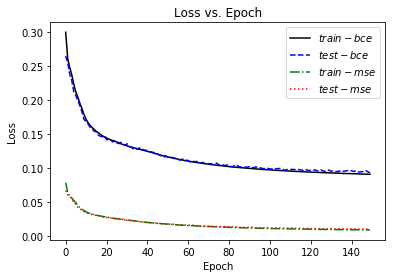

In [26]:
#Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]
plt.plot(deep_ae_model_bce_history.history['loss'], '-', linewidth=1.5, color='black', label='$train-bce$')
plt.plot(deep_ae_model_bce_history.history['val_loss'], '--', linewidth=1.5, color='blue', label='$test-bce$')
plt.plot(deep_ae_model_mse_history.history['loss'], '-.', linewidth=1.5, color='green', label='$train-mse$')
plt.plot(deep_ae_model_mse_history.history['val_loss'], ':', linewidth=1.5, color='red', label='$test-mse$')
plt.title('Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='bottom right')
plt.show()

#10 sample images of original image 

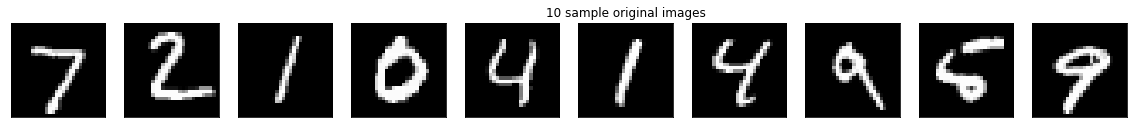

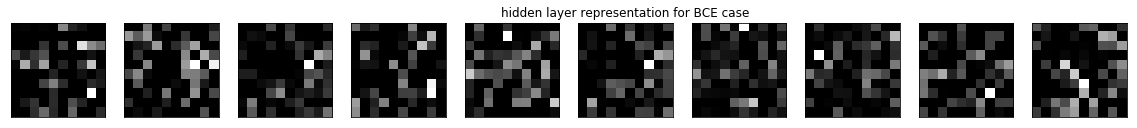

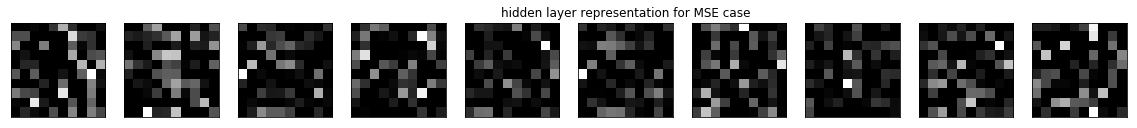

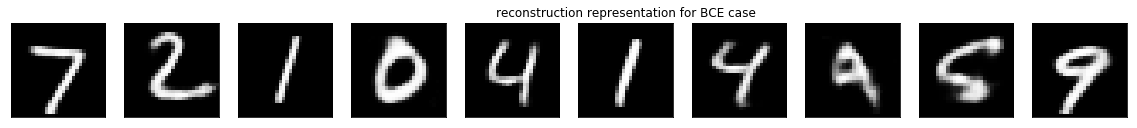

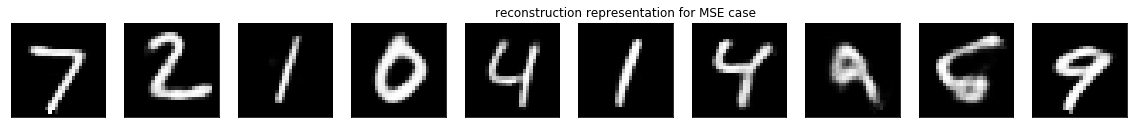

In [27]:
#Show samples of 10 images
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_orig = plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax_im_orig.get_xaxis().set_visible(False)
  ax_im_orig.get_yaxis().set_visible(False)
  if i==5:
    ax_im_orig.set_title('10 sample original images')


#Show samples of their hidden layer representations for BCE and MSE cases
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_hl_bce = plt.subplot(1,n,i+1)
  plt.imshow(deep_ae_model_bce_hl[i].reshape(10,10))
  plt.gray()
  ax_im_hl_bce.get_xaxis().set_visible(False)
  ax_im_hl_bce.get_yaxis().set_visible(False)
  if i==5:
    ax_im_hl_bce.set_title('hidden layer representation for BCE case')

plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_hl_mse = plt.subplot(1,n,i+1)
  plt.imshow(deep_ae_model_mse_hl[i].reshape(10,10))
  plt.gray()
  ax_im_hl_mse.get_xaxis().set_visible(False)
  ax_im_hl_mse.get_yaxis().set_visible(False)
  if i==5:
    ax_im_hl_mse.set_title('hidden layer representation for MSE case')

#Show samples of their reconstructions for BCE and MSE cases
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_rec_bce = plt.subplot(1,n,i+1)
  plt.imshow(reconstructions_fc_bce[i].reshape(28,28))
  plt.gray()
  ax_im_rec_bce.get_xaxis().set_visible(False)
  ax_im_rec_bce.get_yaxis().set_visible(False)
  if i==5:
    ax_im_rec_bce.set_title('reconstruction representation for BCE case')

plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_rec_mse = plt.subplot(1,n,i+1)
  plt.imshow(reconstructions_fc_mse[i].reshape(28,28))
  plt.gray()
  ax_im_rec_mse.get_xaxis().set_visible(False)
  ax_im_rec_mse.get_yaxis().set_visible(False)
  if i==5:
    ax_im_rec_mse.set_title('reconstruction representation for MSE case')

#Part 2: Deep Convolutional AutoEncoder

In [28]:
#Reshape data into 2-D signals and account for grayscale channel in each image
data_train_cv_ae = data_train.reshape(60000,28,28,1)
data_test_cv_ae = data_test.reshape(10000,28,28,1)

In [29]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    #Encoder
    model.add(Conv2D(16, kernel_size = 3, use_bias = True, bias_initializer = "zeros", activation = "relu", padding = "same", input_shape = (28,28,1)))
    #max pooling layer
    model.add(MaxPooling2D(pool_size = (2,2), padding = "same"))
    #Convolutional with 8 feature maps
    model.add(Conv2D(8, kernel_size = 3, use_bias = True, bias_initializer = "zeros", activation = "relu", padding = "same"))
    #bottleneck layer
    model.add(MaxPooling2D(pool_size = (2,2), padding = "same"))
    #Convolutional layer with 8 feature maps
    model.add(Conv2D(8, kernel_size = 3, use_bias = True, bias_initializer = "zeros", activation = "relu", padding = "same"))
    # upsampling layer
    model.add(UpSampling2D((2,2)))
    #Convolutional layer with 16 feature maps
    model.add(Conv2D(16, kernel_size = 3, use_bias = True, bias_initializer = "zeros", activation = "relu", padding = "same"))
    # upsampling layer
    model.add(UpSampling2D((2,2)))
    #Convolutional layer with 1 feature map
    model.add(Conv2D(1, kernel_size = 3, use_bias = True, bias_initializer = "zeros", activation = "sigmoid", padding = "same")) 
    return model

#Create deep autoencoder graph
conv_ae_model_bce = cae()
conv_ae_model_mse = cae()
#conv_ae_model_bce.summary()

#Compile model using an appropriate loss and optimizer algorithm
conv_ae_model_bce.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop' )
conv_ae_model_mse.compile(loss = 'mean_squared_error', optimizer = 'RMSprop')
#Train the model and assign training meta-data to a variable
conv_ae_model_bce_history = conv_ae_model_bce.fit(data_train_cv_ae, data_train_cv_ae, validation_data = (data_test_cv_ae, data_test_cv_ae), epochs = 150, batch_size = 1024, shuffle =True)
conv_ae_model_mse_history = conv_ae_model_mse.fit(data_train_cv_ae, data_train_cv_ae, validation_data = (data_test_cv_ae, data_test_cv_ae), epochs = 150, batch_size = 1024, shuffle =True)

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_conv_bce = conv_ae_model_bce.predict(data_test_cv_ae)
reconstructions_conv_mse = conv_ae_model_mse.predict(data_test_cv_ae)
#Obtain encoder representation of data
get_hl_bce = K.function([conv_ae_model_bce.layers[0].input], [conv_ae_model_bce.layers[3].output])  # The fourth hidden layer are indexed at 3
get_hl_mse = K.function([conv_ae_model_mse.layers[0].input], [conv_ae_model_mse.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_model_hl_bce = get_hl_bce([data_test_cv_ae])[0]
conv_ae_model_hl_mse = get_hl_mse([data_test_cv_ae])[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3288 - val_loss: 0.1845
Epoch 2/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1655 - val_loss: 0.1497
Epoch 3/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1443 - val_loss: 0.1360
Epoch 4/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1324 - val_loss: 0.1267
Epoch 5/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1245 - val_loss: 0.1199
Epoch 6/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1184 - val_loss: 0.1151
Epoch 7/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1137 - val_loss: 0.1114
Epoch 8/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1099 - val_loss: 0.1057
Epoch 9/150
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1068 - val_loss: 0.1

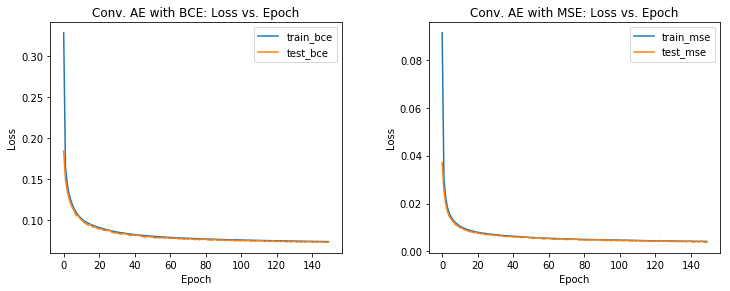

In [30]:
#Plot loss vs epoch  for BCE [Together or separate, Both accepted]
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.5)
ax1.plot(conv_ae_model_bce_history.history['loss'])
ax1.plot(conv_ae_model_bce_history.history['val_loss'])
ax1.set_title('Conv. AE with BCE: Loss vs. Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(['train_bce','test_bce'], loc='best')
#Plot loss vs epoch  for BCE and MSE [Together or separate, Both accepted]
ax2.plot(conv_ae_model_mse_history.history['loss'])
ax2.plot(conv_ae_model_mse_history.history['val_loss'])
ax2.set_title('Conv. AE with MSE: Loss vs. Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train_mse','test_mse'], loc='best')

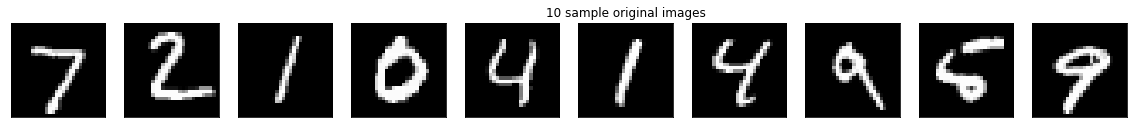

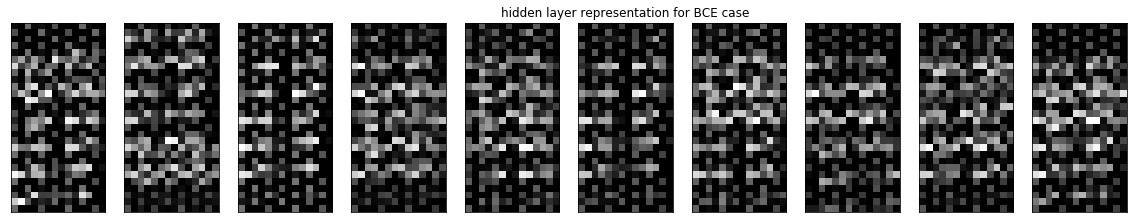

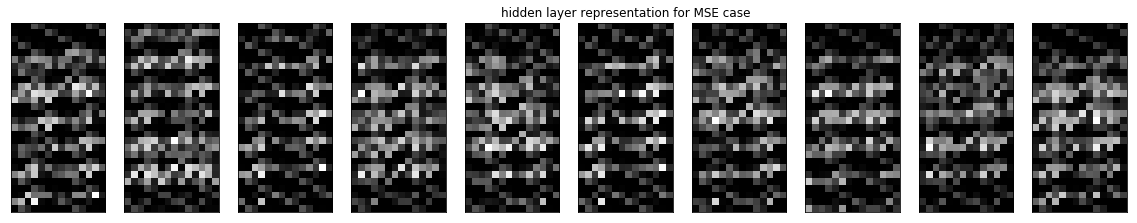

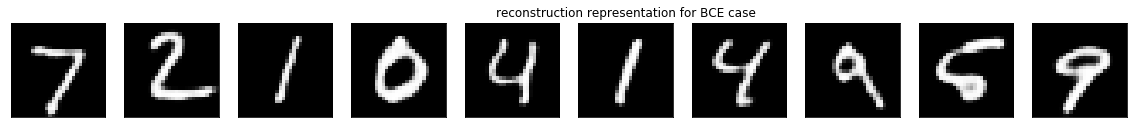

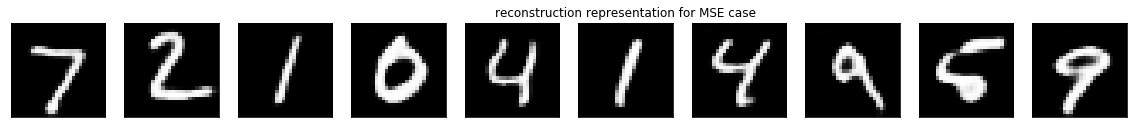

In [31]:
#Show samples of 10 images
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_orig = plt.subplot(1,n,i+1)
  plt.imshow(data_test[i].reshape(28,28))
  plt.gray()
  ax_im_orig.get_xaxis().set_visible(False)
  ax_im_orig.get_yaxis().set_visible(False)
  if i==5:
    ax_im_orig.set_title('10 sample original images')


#Show samples of their hidden layer representations for BCE and MSE cases
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_hl_bce = plt.subplot(1,n,i+1)
  plt.imshow(conv_ae_model_hl_bce[i].reshape(28,14))
  plt.gray()
  ax_im_hl_bce.get_xaxis().set_visible(False)
  ax_im_hl_bce.get_yaxis().set_visible(False)
  if i==5:
    ax_im_hl_bce.set_title('hidden layer representation for BCE case')

plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_hl_mse = plt.subplot(1,n,i+1)
  plt.imshow(conv_ae_model_hl_mse[i].reshape(28,14))
  plt.gray()
  ax_im_hl_mse.get_xaxis().set_visible(False)
  ax_im_hl_mse.get_yaxis().set_visible(False)
  if i==5:
    ax_im_hl_mse.set_title('hidden layer representation for MSE case')

#Show samples of their reconstructions for BCE and MSE cases
plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_rec_bce = plt.subplot(1,n,i+1)
  plt.imshow(reconstructions_conv_bce[i].reshape(28,28))
  plt.gray()
  ax_im_rec_bce.get_xaxis().set_visible(False)
  ax_im_rec_bce.get_yaxis().set_visible(False)
  if i==5:
    ax_im_rec_bce.set_title('reconstruction representation for BCE case')

plt.figure(figsize=(20,4))
for i in range(n):
  ax_im_rec_mse = plt.subplot(1,n,i+1)
  plt.imshow(reconstructions_conv_mse[i].reshape(28,28))
  plt.gray()
  ax_im_rec_mse.get_xaxis().set_visible(False)
  ax_im_rec_mse.get_yaxis().set_visible(False)
  if i==5:
    ax_im_rec_mse.set_title('reconstruction representation for MSE case')